#Place your name, Uid, Date, Class, and HW # at the top of your notebook using markup.
#Sree Sai Ogeti Ammini u1438963 05/25/2023 
* This is HW1 of CS6017 Data Analysis and Virtualization


Mean Values of 100 random numbers are equal
Standard Devaition Values of 100 random numbers are not equal
Mean Values of 100000 random numbers are equal
Standard Devaition Values of 100000 random numbers are equal
My Mean Function: -0.0027
My Standard Deviation Funtion: 0.9954
NumPy Mean: -0.0026634696161412855
NumPy Standard Deviation: 0.9954175256708219


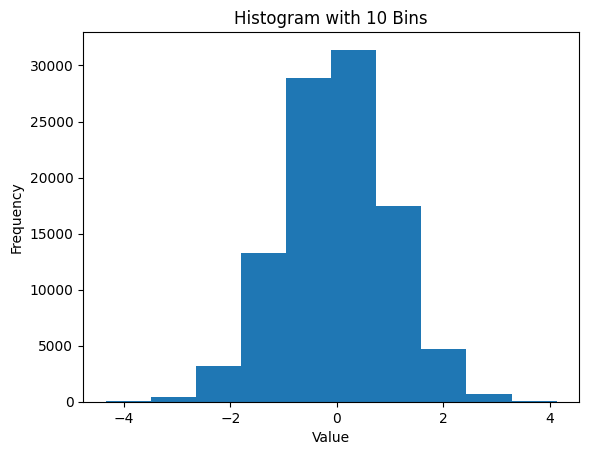

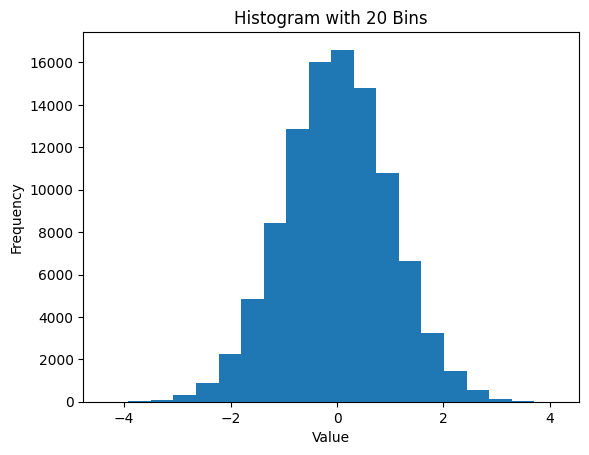

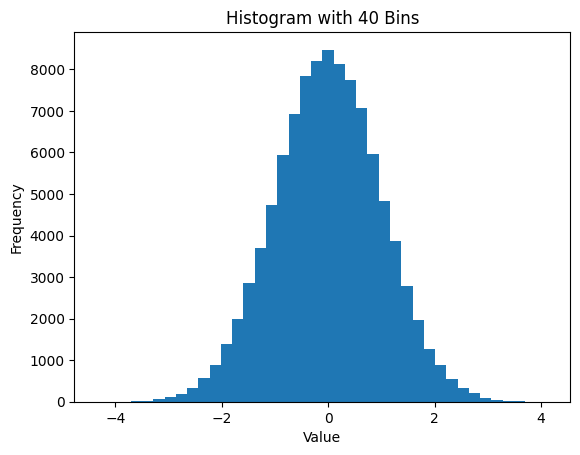

In [4]:
#Part 1: Python/Numpy Warmup
import numpy as np
import math
#Create an array of 100 random numbers using the Numpy rand function.
random_number_array = np.random.rand(100) #Array of Size 100 with random integer

#Write functions to compute a) the mean, and b) standard deviation of a Numpy array of data.
def mean(data): 
    length = len(data)
    if length == 0:
        return 0
    sum_array = sum(data)
    return round(sum_array/length,4)

def standard_devaition(data):
    length = len(data)
    if length <= 1:
        return 0.0
    mean_data = mean(data)
    variance = sum((x - mean_data) ** 2 for x in data) / (length - 1)
    std_dev = math.sqrt(variance)
    return round(std_dev,4)

# Compute mean and standard deviation
mean_array = mean(random_number_array)
standard_devaition_array = standard_devaition(random_number_array)

#Verify that your mean/std deviation functions work correctly. What happens (to the mean/std dev) when you increase the number of random numbers from 100 to 100000?
if(mean_array == round(np.mean(random_number_array),4)):
    print("Mean Values of 100 random numbers are equal")
else:
    print("Mean Values of 100 random numbers are not equal")    

if(standard_devaition_array == round(np.std(random_number_array),4)):
    print("Standard Devaition Values of 100 random numbers are equal")
else:
    print("Standard Devaition Values of 100 random numbers are not equal")  

random_number_array_100000 = np.random.rand(100000)
mean_array_100000 = mean(random_number_array_100000)
standard_devaition_array_100000 = standard_devaition(random_number_array_100000)

if(mean_array_100000 == round(np.mean(random_number_array_100000),4)):
    print("Mean Values of 100000 random numbers are equal")
else:
    print("Mean Values of 100000 random numbers are not equal")    

if(standard_devaition_array_100000 == round(np.std(random_number_array_100000),4)):
    print("Standard Devaition Values of 100000 random numbers are equal")
else:
    print("Standard Devaition Values of 100000 random numbers are not equal")  

#Now use scipy.stats.norm to sample from the normal (gaussian) distribution to create an array of data (10000 values). 
# Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods. 
# Verify you get the expected results (you know what these values should be if you sample from a normal distribution). 
# [NOTE: I've edited the next line to refer to scipy.stats.norm.  Previously it referred to Numpy.  [You don't need to update your answer but you can.] 
# What does the results of the mean/std dev of this data tell you about Scipy's norm's rvs function?

from scipy.stats import norm
gaussian_data = norm.rvs(size=100000)
my_mean = mean(gaussian_data)
my_standard_devaition = standard_devaition(gaussian_data)
mean_numpy = np.mean(gaussian_data)
std_dev_numpy = np.std(gaussian_data)

print("My Mean Function:", my_mean)
print("My Standard Deviation Funtion:", my_standard_devaition)
print("NumPy Mean:", mean_numpy)
print("NumPy Standard Deviation:", std_dev_numpy)


#Plot a histogram of your samples (using the pyplot hist function). Experiment with using 10, 20, 40 bins.

import matplotlib.pyplot as plt

# Plot histogram with 10 bins
plt.hist(gaussian_data, bins=10)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 10 Bins")
plt.show()

# Plot histogram with 20 bins
plt.hist(gaussian_data, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 20 Bins")
plt.show()

# Plot histogram with 40 bins
plt.hist(gaussian_data, bins=40)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 40 Bins")
plt.show()


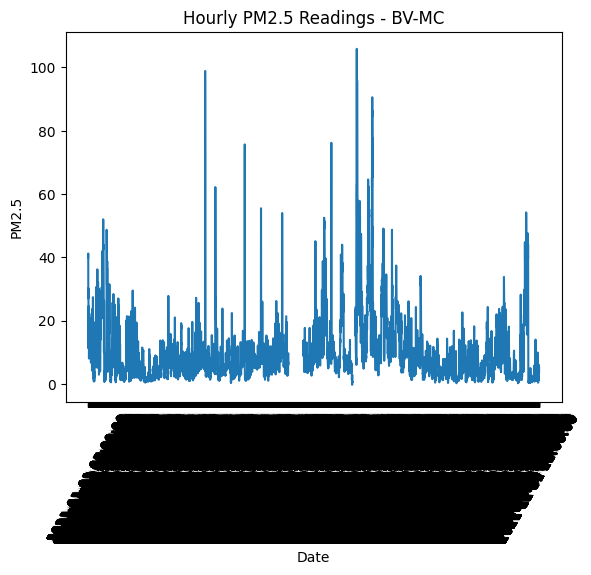

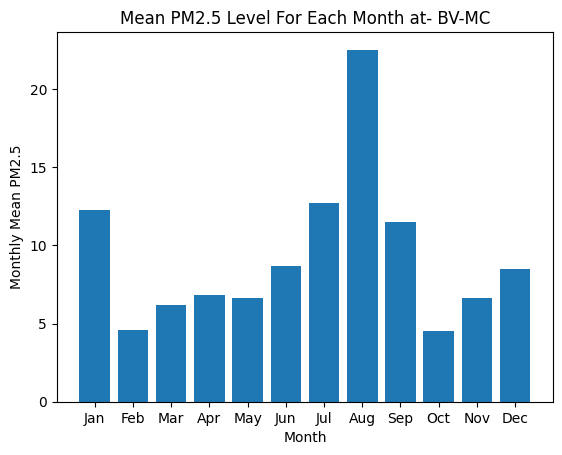

Insights :: The Highest pollution recorded at 8 month and least pollution is recorded at 10 month for BV-MC Station


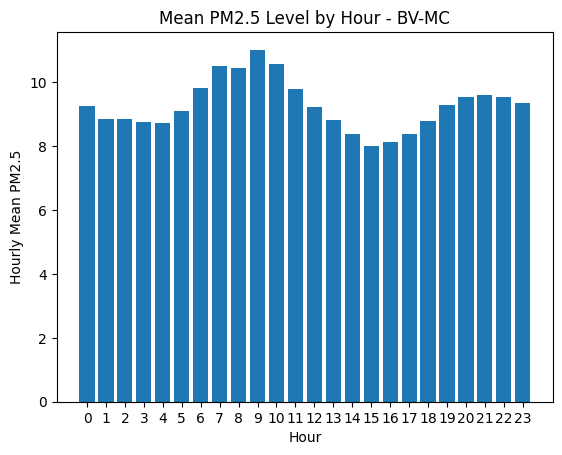

Insights :: The Highest pollution recorded at 9 :00 hour and least pollution is recorded at 15:00 hour for BV-MC Station during a day
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/generic.py", line 513, in _get_axis_number
    return cls._AXIS_TO_AXIS_NUMBER[axis]
           ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
KeyError: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/lg/xtgwd3yd1px4gys2pqwvld4h0000gn/T/ipykernel_83204/1952369333.py", line 61, in <module>
    dataset.boxplot(column='BV-MC',by=dataset['Date'].dt.month.all)
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_core.py", line 507, in boxplot_frame
    return plot_backend.boxplot_frame(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/boxplot.py", line 469, in boxplot_frame
    ax = boxplo

In [5]:
#Part 2: Data Exploration/Analysis

#1. Grab a year's worth of hourly SLC PM2.5 data in CSV form from hereLinks to an external site. (at the bottom) - save the csv file locally for ease of access.
    #Pick one of the monitoring stations from the dataset and perform your analysis from the readings from that station.


import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./2021_PM_2.5.csv')
station_name = 'BV-MC'

#2. Plot the readings from that station over the course of a year

plt.plot(dataset['Date'], dataset['BV-MC'])
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title(f'Hourly PM2.5 Readings - {station_name}')
plt.xticks(rotation=60)
plt.show()

# #3.You'll find that there's so much data that it's difficult to gain much insight from this visualization. We want to explore the variation of pollution levels over time, looking at 2 different timescales.
# #Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization.

dataset['Date'] = pd.to_datetime(dataset['Date'])

monthly_mean = dataset.groupby(dataset['Date'].dt.month)['BV-MC'].mean()
plt.bar(monthly_mean.index, monthly_mean)
plt.xlabel('Month')
plt.ylabel('Monthly Mean PM2.5')
plt.title(f'Mean PM2.5 Level For Each Month at- {station_name}')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Get the timestamp corresponding to the highest mean value
highest_monthly_mean_timestamp = monthly_mean[monthly_mean == monthly_mean.max()].index[0]
# Get the timestamp corresponding to the least mean value
least_monthly_mean_timestamp = monthly_mean[monthly_mean == monthly_mean.min()].index[0]
print(f"Insights :: The Highest pollution recorded at {highest_monthly_mean_timestamp} month and least pollution is recorded at {least_monthly_mean_timestamp} month for BV-MC Station")


#Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?

hourly_mean = dataset.groupby(dataset['Date'].dt.hour)['BV-MC'].mean()
plt.bar(hourly_mean.index , hourly_mean)
plt.xlabel('Hour')
plt.ylabel('Hourly Mean PM2.5')
plt.title(f'Mean PM2.5 Level by Hour - {station_name}')
plt.xticks(range(24))
plt.show()

# Get the timestamp corresponding to the highest mean value
highest_mean_timestamp = hourly_mean[hourly_mean == hourly_mean.max()].index[0]
# Get the timestamp corresponding to the least mean value
least_mean_timestamp = hourly_mean[hourly_mean == hourly_mean.min()].index[0]
print(f"Insights :: The Highest pollution recorded at {highest_mean_timestamp} :00 hour and least pollution is recorded at {least_mean_timestamp}:00 hour for BV-MC Station during a day")

#The mean only gives us a very coarse view of the monthly/hourly data. 
# Use "Box and Whisker" plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?
# Create a box and whisker plot of the hourly data
dataset.boxplot(column='BV-MC',by=dataset['Date'].dt.month.all)
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title(f'Box and Whisker Plot of PM2.5 Levels by Month - {station_name}')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('')
plt.show()

dataset.boxplot(column='BV-MC',by=dataset['Date'].dt.hour.all)
plt.xlabel('Hour')
plt.ylabel('PM2.5')
plt.title(f'Box and Whisker Plot of PM2.5 Levels by Hour - {station_name}')
plt.xticks(range(24))
plt.suptitle('')
plt.show()


#Insights We should be able to see the median value the line inside the box for monthly data but for horuly nothing came up